In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
#  Importing Dataset
df = pd.read_csv("C:\\Users\\AIMS\\Desktop\\Huzaifa\\AIMS_DataSet2023\\homeprices1.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


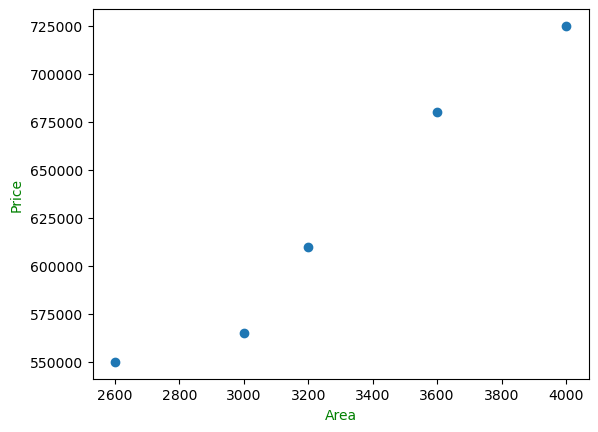

In [20]:
plt.xlabel("Area",color ="green")
plt.ylabel("Price",color ="green")

plt.scatter(df.area,df.price)

plt.show()

<Axes: xlabel='area', ylabel='price'>

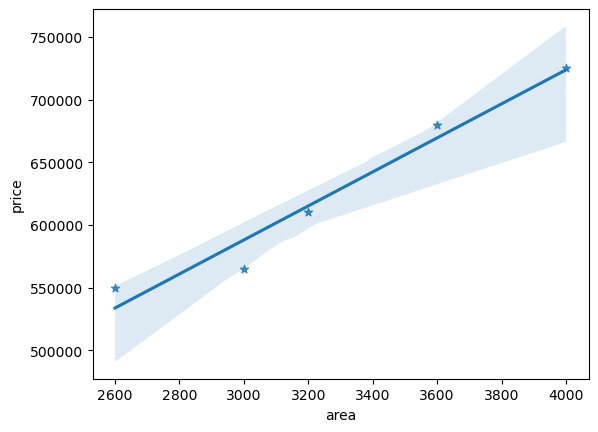

In [42]:
import seaborn as sns
sns.regplot(x='area',y='price',data=df,marker = '*')

In [28]:
df['price']

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [29]:
df['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [30]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [32]:
# price = df['price']
# or 
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [33]:
# create Linear Regression Object

from sklearn import linear_model

reg = linear_model.LinearRegression()


In [50]:
#  Train Data(x,y)

reg.fit(df[['area']],df['price'])


LinearRegression()

In [47]:
# predict price of home of 3300 sqt ft
reg.predict([[3300]])


C:\Users\AIMS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

Y = m * X + b

 Where m is the coefficient [slope of the line ] and b is the y Intercept same as 

Price = slope * Area + y_Intercept

In [51]:
reg.intercept_

180616.43835616432

In [52]:
reg.coef_

array([135.78767123])

In [54]:
# Price = slope * Area + y_Intercept

print(f"Same As Early Predicted Value : {3300 * 135.78767123 +180616.43835616432}")

Same As Early Predicted Value : 628715.7534151643


In [59]:
# predict a value of home of 5000 sq ft

# reg.predict([[5000]]) #from Predict

reg.coef_ 



array([135.78767123])

In [58]:
reg.intercept_

180616.43835616432

In [61]:
# passing a dataframe raised a warning, hence converting the x data to 
# np array will remove the warning 
X = new_df['area'].to_numpy()
X = X.reshape(-1,1)
X

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]], dtype=int64)

In [63]:
y_pred = reg.predict(X)
y_pred

C:\Users\AIMS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [65]:
new_df1 = pd.DataFrame({
    'Actual':price,
    'Predicted':y_pred
})
new_df1

,Actual,Predicted
0,550000,533664.383562
1,565000,587979.452055
2,610000,615136.986301
3,680000,669452.054795
4,725000,723767.123288


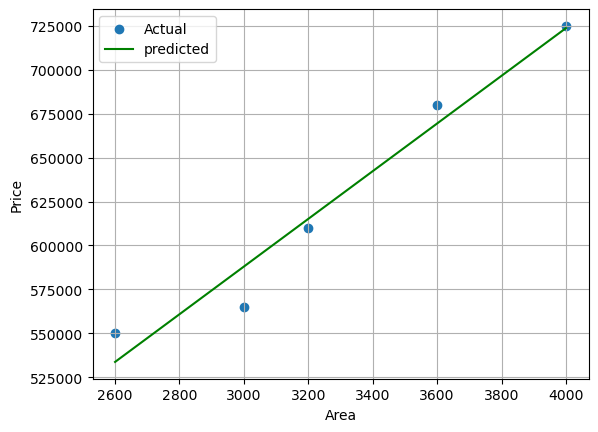

In [67]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.scatter(X,price,label ="Actual")
plt.plot(X,y_pred,label="predicted",color= "g")
plt.legend()
plt.show()

In [68]:
# Importing dataset
Area_df = pd.read_csv("C:\\Users\\AIMS\\Desktop\\Huzaifa\\AIMS_DataSet2023\\areas.csv")
Area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [70]:
Area_Data = Area_df['area'].to_numpy().reshape(-1,1)
Area_Data

array([[1000],
       [1500],
       [2300],
       [3540],
       [4120],
       [4560],
       [5490],
       [3460],
       [4750],
       [2300],
       [9000],
       [8600],
       [7100]], dtype=int64)

In [93]:
Area_pred = reg.predict(Area_Data)
Area_pred

array([-803745.68263275, -389513.14502139,  273258.91515678,
       1300555.60843294, 1781065.35206211, 2145589.9851601 ,
       2916062.50511722, 1234278.40241512, 2302998.34945242,
        273258.91515678, 5823974.91914894, 5492588.88905985,
       4249891.27622579])

In [81]:
Area_df['prices'] = Area_pred
Area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [83]:
Area_df.to_csv(r"C:\Users\AIMS\Desktop\Huzaifa\AIMS_DataSet2023\Prediction1.csv")

In [91]:
# 

PerCapita_Df = pd.read_csv("C:\\Users\\AIMS\\Desktop\\Huzaifa\\AIMS_DataSet2023\\per_capita_income.csv",delimiter="\t")
PerCapita_Df


,year,per capita income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [92]:
reg = linear_model.LinearRegression()
# reg.fit(X,y) where X is independent variable and y is dependent variable
reg.fit(PerCapita_Df[['year']].to_numpy().reshape(-1,1),PerCapita_Df['per capita income'])
reg.predict([[2020]])


array([41288.69409442])